# Collecting metrics from single lines

Leanne Friedrich 7/22/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measuring stills

## measure all stills

In [81]:
# for s in ['LapRD LapRD 3day']:
ftop = os.path.join(cfg.path.server, 'singleLines', 'LapRD LapRD 1day')
me.measureStillsRecursive(ftop, overwrite=True, overwriteList=['vert', 'horiz', 'xs'])

INFO: Measuring I_2.25_S_2.25_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25\I_2.25_S_2.25_210727\I_2.25_S_2.25_210727_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25\I_2.25_S_2.25_210727\I_2.25_S_2.25_210727_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25\I_2.25_S_2.25_210727\I_2.25_S_2.25_210727_horizSummary.csv
INFO: Measuring I_2.25_S_2.50_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal

## measure one folder

In [240]:
file = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day\I_2.25_S_3.00\I_2.25_S_3.00_210727')
me.measureStills(file)

INFO: Measuring I_2.25_S_3.00_210727


## diagnostics

In [79]:
i = '2.50'
s = '3.50'
folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day',f'I_{i}_S_{s}', f'I_{i}_S_{s}_210727')
# folder = os.path.join(cfg.path.server, r'singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_7.5_VS_2.5_210824')
me.checkAndDiagnoseRecursive(folder, redo=False)

INFO: Problems detected in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.50_S_3.50\I_2.50_S_3.50_210727


,code,description,value,st
0,5,Inconsistent horiz values,[totarea],horiz


In [19]:
r,_ = me.stillsSummary(folder, '', filename='empty.csv')
display(r[['bn', 'xs_aspect', 'xs_aspect_SE', 'xs_areaN', 'xs_areaN_SE', 'xs_roughness']])

,bn,xs_aspect,xs_aspect_SE,xs_areaN,xs_areaN_SE,xs_roughness
0,I_M6_S_3.00_VI_7.5_VS_2.5_210824,1.397807,0.025401,1.618388,0.037318,0.006758


({'line': 2.0,
  'aspect': 3.7450980392156863,
  'xshift': 0.039114126313509086,
  'yshift': 0.0992513595209856,
  'area': 5792.0,
  'x0': 351.0,
  'y0': 633.0,
  'w': 51.0,
  'h': 191.0,
  'xc': 378.49482044198896,
  'yc': 747.4570096685082,
  'roughness': 0.012176342845614307},
 {'line': '',
  'aspect': 'h/w',
  'xshift': 'w',
  'yshift': 'h',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'xc': 'px',
  'yc': 'px',
  'roughness': ''})

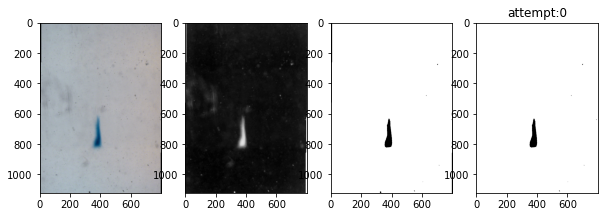

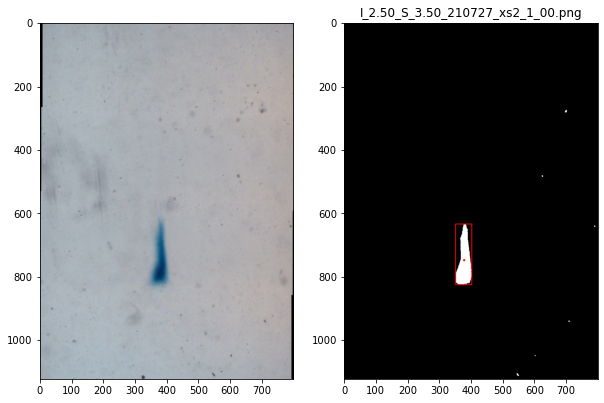

In [80]:
me.measure1Line(os.path.join(folder), 'xs', 1, diag=2)

INFO: Measuring I_2.25_S_2.50_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_horizSummary.csv


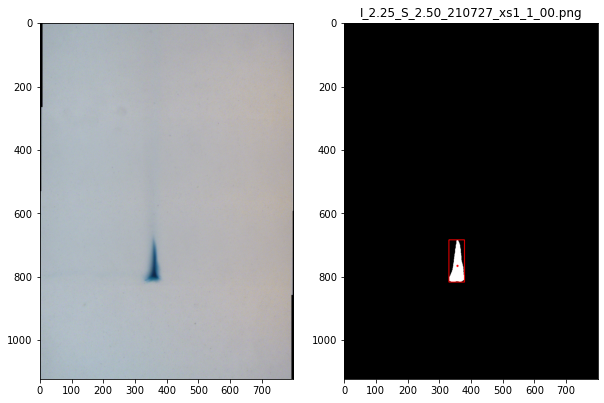

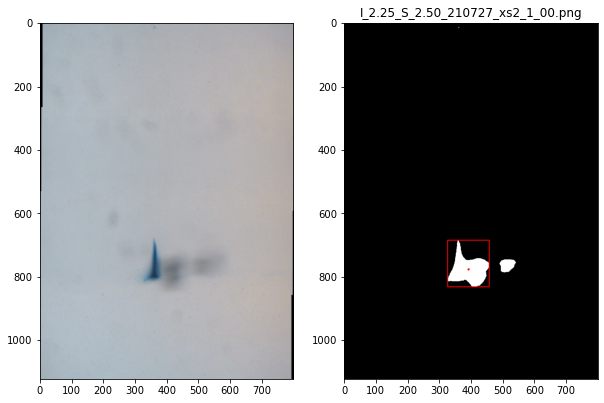

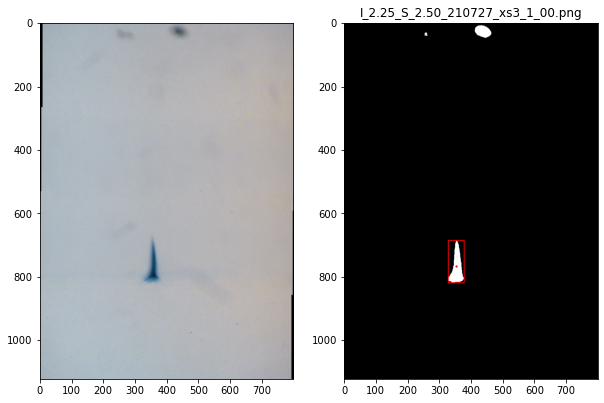

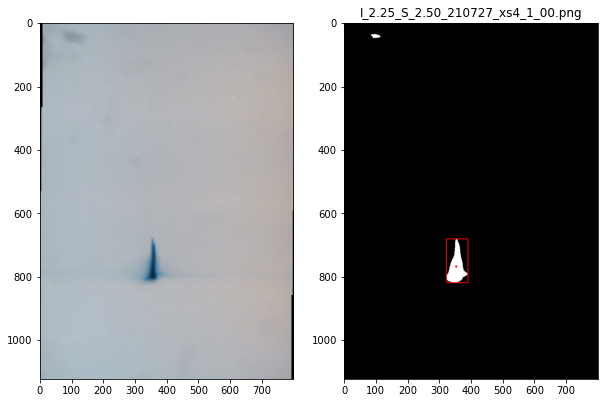

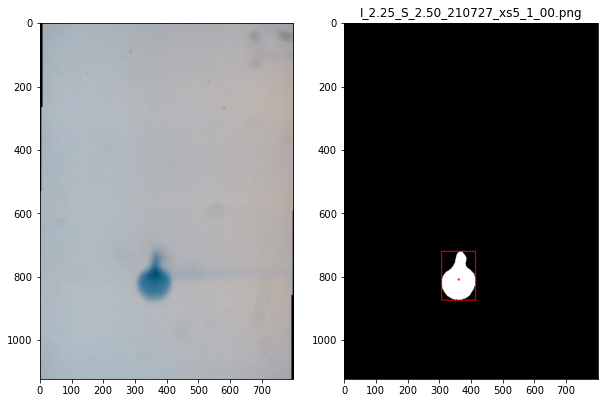

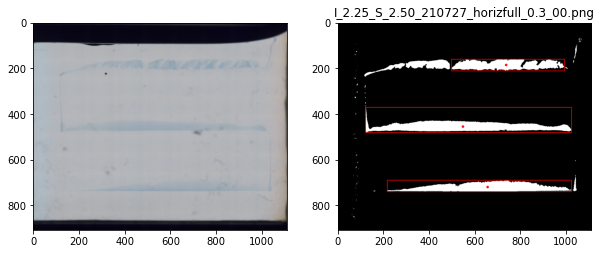

In [38]:
me.measureStillsRecursive(folder, overwrite=True, diag=1)

In [33]:
import cv2 as cv
import numpy as np
import vidMorph as vm
import vidCrop as vc
from imshow import imshow

In [34]:
fl.xs1Stitch[0]

'//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\\vels LapRD LapRD 1day\\I_2.75_S_2.75\\I_2.75_S_2.75_VI_5_VS_10_210824\\I_2.75_S_2.75_VI_5_VS_10_210824_xs1_1_00.png'

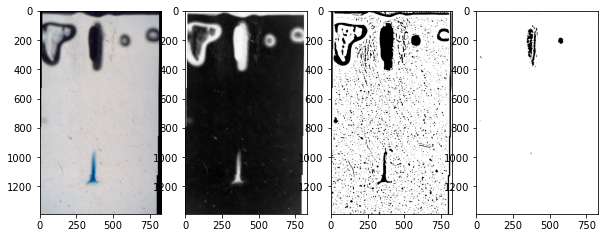

In [188]:
fl = me.fileList(folder)
im = cv.imread(fl.xs4Stitch[0])
# im = vc.imcrop(im, 10)
im0 = im
im0[0, 0] = np.zeros(im0[0, 0].shape)
img = im0
if len(img.shape)==3:
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
else:
    gray = img.copy()
gray = cv.medianBlur(gray, 5)
thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filled = vm.fillComponents(thresh)
thresh = cv.add(255-thresh,filled)
imshow(img, gray, thresh, filled)

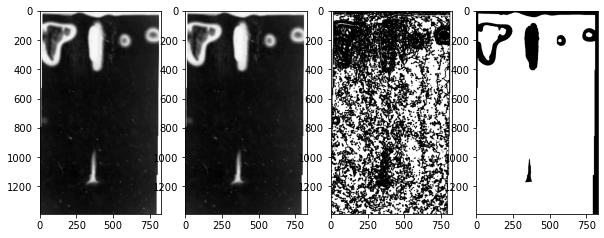

In [189]:
norm = np.zeros(gray.shape)
final = cv.normalize(gray,  norm, 0, 255, cv.NORM_MINMAX)
edge = cv.Canny(final, 5, 15)
edge = vm.dilate(edge, 5)
t2 = vm.threshes(im, gray, True, 0)

imshow(gray, final, edge, t2)

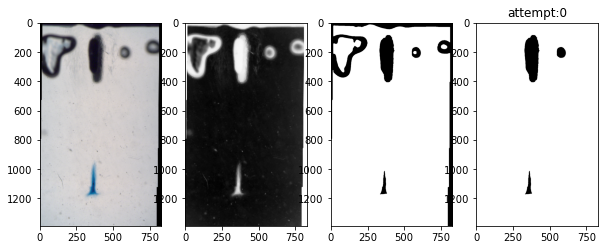

In [192]:
im2, markers, attempt = vm.segmentInterfaces(im, attempt0=0, acrit=100, diag=2)

In [196]:
import pandas as pd

In [203]:
df = pd.DataFrame(markers[2], columns=['x0', 'y0', 'w','h','a'])
df2 = pd.DataFrame(markers[3], columns=['xc','yc'])
df = pd.concat([df, df2], axis=1)
df

,x0,y0,w,h,a,xc,yc
0,0,0,828,1387,1116064,413.856073,703.603989
1,328,88,104,323,25218,380.077048,241.616108
2,548,169,62,75,3808,577.533876,207.017595
3,332,1011,48,162,3346,359.949193,1111.078302


array([[ 413.85607277,  703.60398866],
       [ 380.07704814,  241.61610754],
       [ 577.53387605,  207.01759454],
       [ 359.94919307, 1111.07830245]])

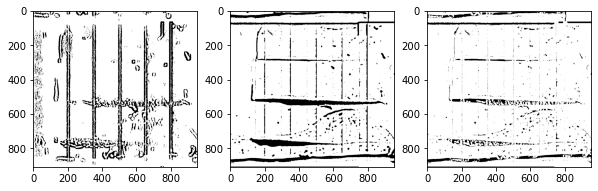

In [157]:
sobel_y = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1],[-1, 0, 1],[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

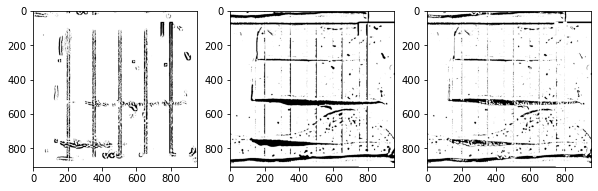

In [158]:
sobel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

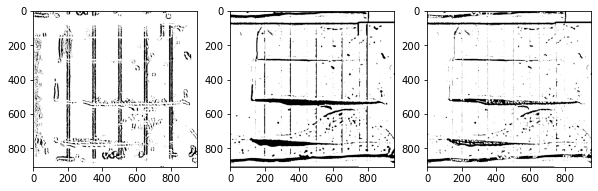

In [176]:
sobel_y = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1], [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1,2, 1]])
filtered_image_x = cv.filter2D(gray, -1, sobel_x)
filterthres2 = 255-cv.adaptiveThreshold(filtered_image_x,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = cv.subtract(filterthres,filterthres2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

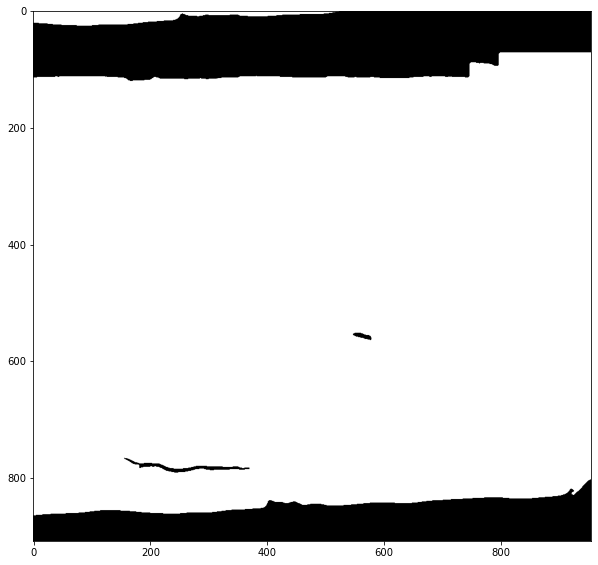

In [187]:
r,t=cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
imshow(t)